Exploratory data analysis (EDA) is a crucial component of data science which allows one to understand the basics of what your data looks like and what kinds of questions might be answered by them. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, answer the following questions by writing code in the cells.


In [1]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing


%matplotlib inline


In [2]:
#### load the movie dataset and create their dataframes

movies_df = pd.read_csv('movies.csv', encoding = 'unicode_escape')
movies_df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bondâs past sends him...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Français""}, {""is...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states–mexico ba...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Español""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id""

### Data Cleansing 
#### Clean the data. Identify columns that are redundant or unnecessary.

It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'overview', 'production_companies', 'original_title'] from the data set as they will not be used in the analysis.

In [3]:
cols = ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'overview', 'production_companies', 'original_title']

movies_df.drop(cols, inplace=True, axis=1)
movies_df.columns

Index(['budget', 'genres', 'id', 'popularity', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'title',
       'vote_average', 'vote_count'],
      dtype='object')

#### Remove any duplicate rows

In [4]:
movie_df = movies_df.drop_duplicates(inplace = True)

In [5]:
# check for any duplicated rows in the dataset based on title
movies_df[movies_df['title'].duplicated(keep=False)]

# as can be seen, there are a few duplicates, however these are different movies with different release dates, ids and production countries according to the data itself 
# e.g. the Host is duplicated with one produced in the US in 2013 and another in South Korea in 2006 - clearly two different movies 

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
972,44000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",72710,42.933027,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-03-22,63327201,125.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Host,6.0,1817
1359,35000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",268,44.104469,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1989-06-23,411348924,126.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Batman,7.0,2096
2877,11000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 18, ""nam...",1255,27.655270,"[{""iso_3166_1"": ""KR"", ""name"": ""South Korea""}]",2006-07-27,88489643,119.0,"[{""iso_639_1"": ""ko"", ""name"": ""한국어/조선말""}]",The Host,6.7,537
3647,0,"[{""id"": 18, ""name"": ""Drama""}]",39269,0.679351,"[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}]",1980-05-01,0,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Out of the Blue,6.5,17
3693,0,"[{""id"": 18, ""name"": ""Drama""}]",10844,0.706355,"[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}]",2006-10-12,0,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Out of the Blue,5.9,18
4267,1377800,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",2661,9.815394,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1966-07-30,0,105.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Batman,6.1,203


#### Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [6]:
# pandas does not like using ! as not so hence why we use ~ instead 
# select any movie where the budget OR revenue is NOT equal to 0 
movies_df = movies_df.loc[~((movies_df['budget'] == 0) | (movies_df['revenue'] == 0))]
movies_df

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Français""}, {""is...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...
4773,27000,"[{""id"": 35, ""name"": ""Comedy""}]",2292,19.748658,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1994-09-13,3151130,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Clerks,7.4,755
4788,12000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 35, ""nam...",692,4.553644,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1972-03-12,6000000,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pink Flamingos,6.2,110
4792,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",36095,0.212443,"[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",1997-11-06,99000,111.0,"[{""iso_639_1"": ""ja"", ""name"": ""日本語""}]",Cure,7.4,63
4796,7000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",14337,23.307949,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2004-10-08,424760,77.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Primer,6.9,658


In [7]:
# check if there are any NaN using isnull().sum() 
movies_df['budget'].isnull().sum()


0

In [8]:
# check if there are any NaN using isnull().sum() 
movies_df['revenue'].isnull().sum()

0

#### To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into Date format and extract the year from the date. This will help us in analysing yearly data.

In [9]:
# Change the release_date column to DateTime column

movies_df['DateTime'] = pd.to_datetime(movies_df['release_date'], format='%Y-%m-%d')

movies_df['DateTime']

# Extract the release year from every release date

movies_df['release_year'] = movies_df['DateTime'].dt.year

# also extracting month from release date to identify any correlations
movies_df['release_month'] = movies_df['DateTime'].dt.month

movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3229 entries, 0 to 4798
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                3229 non-null   int64         
 1   genres                3229 non-null   object        
 2   id                    3229 non-null   int64         
 3   popularity            3229 non-null   float64       
 4   production_countries  3229 non-null   object        
 5   release_date          3229 non-null   object        
 6   revenue               3229 non-null   int64         
 7   runtime               3229 non-null   float64       
 8   spoken_languages      3229 non-null   object        
 9   title                 3229 non-null   object        
 10  vote_average          3229 non-null   float64       
 11  vote_count            3229 non-null   int64         
 12  DateTime              3229 non-null   datetime64[ns]
 13  release_year      

C:\Users\tayyi\AppData\Local\Temp\ipykernel_2180\561226059.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['DateTime'] = pd.to_datetime(movies_df['release_date'], format='%Y-%m-%d')
C:\Users\tayyi\AppData\Local\Temp\ipykernel_2180\561226059.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['release_year'] = movies_df['DateTime'].dt.year
C:\Users\tayyi\AppData\Local\Temp\ipykernel_2180\561226059.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

#### Change budget and revenue columns format to integer using numpy’s int64 method.

In [10]:
# using pd.to_numeric to convert budget and revenue to int64
movies_df['budget'] = pd.to_numeric(movies_df['budget'])
movies_df['revenue'] = pd.to_numeric(movies_df['revenue'])

movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3229 entries, 0 to 4798
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                3229 non-null   int64         
 1   genres                3229 non-null   object        
 2   id                    3229 non-null   int64         
 3   popularity            3229 non-null   float64       
 4   production_countries  3229 non-null   object        
 5   release_date          3229 non-null   object        
 6   revenue               3229 non-null   int64         
 7   runtime               3229 non-null   float64       
 8   spoken_languages      3229 non-null   object        
 9   title                 3229 non-null   object        
 10  vote_average          3229 non-null   float64       
 11  vote_count            3229 non-null   int64         
 12  DateTime              3229 non-null   datetime64[ns]
 13  release_year      

C:\Users\tayyi\AppData\Local\Temp\ipykernel_2180\1270124436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['budget'] = pd.to_numeric(movies_df['budget'])
C:\Users\tayyi\AppData\Local\Temp\ipykernel_2180\1270124436.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['revenue'] = pd.to_numeric(movies_df['revenue'])


In [11]:
movies_df

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,DateTime,release_year,release_month
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800,2009-12-10,2009,12
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,2007-05-19,2007,5
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Français""}, {""is...",Spectre,6.3,4466,2015-10-26,2015,10
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106,2012-07-16,2012,7
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124,2012-03-07,2012,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,27000,"[{""id"": 35, ""name"": ""Comedy""}]",2292,19.748658,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1994-09-13,3151130,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Clerks,7.4,755,1994-09-13,1994,9
4788,12000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 35, ""nam...",692,4.553644,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1972-03-12,6000000,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pink Flamingos,6.2,110,1972-03-12,1972,3
4792,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",36095,0.212443,"[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",1997-11-06,99000,111.0,"[{""iso_639_1"": ""ja"", ""name"": ""日本語""}]",Cure,7.4,63,1997-11-06,1997,11
4796,7000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",14337,23.307949,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2004-10-08,424760,77.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Primer,6.9,658,2004-10-08,2004,10


On checking the dataset, we see that genres, keywords, production_companies, production_countries, spoken_languages are in the JSON format which will make it difficult to manipulate the dataframe. Now let’s flatten these columns into a format that can be easily interpreted.

I will help you convert them into strings and later convert them into lists. Writing a generic function to parse JSON columns.

In [12]:
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index,movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))
            # the key 'name' contains the name of the genre
        movies_df.loc[index,column]=str(list1)
    
parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
parse_col_json('production_countries', 'name')

movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,DateTime,release_year,release_month
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009-12-10,2009,12
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007-05-19,2007,5
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,2015-10-26,2015,10
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,2012-07-16,2012,7
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012-03-07,2012,3


In [13]:
movies_df

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,DateTime,release_year,release_month
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009-12-10,2009,12
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007-05-19,2007,5
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,2015-10-26,2015,10
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,2012-07-16,2012,7
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012-03-07,2012,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,27000,['Comedy'],2292,19.748658,['United States of America'],1994-09-13,3151130,92.0,['English'],Clerks,7.4,755,1994-09-13,1994,9
4788,12000,"['Horror', 'Comedy', 'Crime']",692,4.553644,['United States of America'],1972-03-12,6000000,93.0,['English'],Pink Flamingos,6.2,110,1972-03-12,1972,3
4792,20000,"['Crime', 'Horror', 'Mystery', 'Thriller']",36095,0.212443,['Japan'],1997-11-06,99000,111.0,['日本語'],Cure,7.4,63,1997-11-06,1997,11
4796,7000,"['Science Fiction', 'Drama', 'Thriller']",14337,23.307949,['United States of America'],2004-10-08,424760,77.0,['English'],Primer,6.9,658,2004-10-08,2004,10


### Now onto the exploration

#### Identify relationships between variables / features

The main goal here is to identify and create relationships which can help you to build ideas. I have defined questions which can help you identify some relationships to explore.

#### Which are the 5 most expensive movies? How do the most expensive and cheapest movies compare? Exploring the most expensive movies help you explore if some movies are worth the money spent on them based on their performance and revenue generated.

In [14]:
# Code here
movies_df.sort_values(by=['budget'], ascending=False).head(5)
# sorting values by budget, 
# ascending is selected as False; the order is from highest to lowest

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,DateTime,release_year,release_month
17,380000000,"['Adventure', 'Action', 'Fantasy']",1865,135.413856,['United States of America'],2011-05-14,1045713802,136.0,"['English', 'Español']",Pirates of the Caribbean: On Stranger Tides,6.4,4948,2011-05-14,2011,5
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007-05-19,2007,5
7,280000000,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,1405403694,141.0,['English'],Avengers: Age of Ultron,7.3,6767,2015-04-22,2015,4
10,270000000,"['Adventure', 'Fantasy', 'Action', 'Science Fi...",1452,57.925623,['United States of America'],2006-06-28,391081192,154.0,"['English', 'Français', 'Deutsch']",Superman Returns,5.4,1400,2006-06-28,2006,6
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012-03-07,2012,3


In [15]:
movies_df.loc[movies_df['budget'].idxmax()]
# Most expensive movie is Pirates of the Caribbean: On Stranger Tides 
# Movie was released in 2011

budget                                                    380000000
genres                           ['Adventure', 'Action', 'Fantasy']
id                                                             1865
popularity                                               135.413856
production_countries                   ['United States of America']
release_date                                             2011-05-14
revenue                                                  1045713802
runtime                                                       136.0
spoken_languages                             ['English', 'Español']
title                   Pirates of the Caribbean: On Stranger Tides
vote_average                                                    6.4
vote_count                                                     4948
DateTime                                        2011-05-14 00:00:00
release_year                                                   2011
release_month                                   

In [16]:
movies_df.loc[movies_df['budget'].idxmin()]
# Cheapest movie is Modern Times (budget is 1?)
# Movie was released in 1936 

budget                                             1
genres                           ['Drama', 'Comedy']
id                                              3082
popularity                                  28.27648
production_countries    ['United States of America']
release_date                              1936-02-05
revenue                                      8500000
runtime                                         87.0
spoken_languages                         ['English']
title                                   Modern Times
vote_average                                     8.1
vote_count                                       856
DateTime                         1936-02-05 00:00:00
release_year                                    1936
release_month                                      2
Name: 4238, dtype: object

#### What are the top 5 most profitable movies? Compare the min and max profits. The comparison helps us indentify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [17]:
# code here
# calculate profit from revenue 
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']

# sort values by profit, order going from highest to lowest
movies_df.sort_values(by=['profit'], ascending=False).head(5)

C:\Users\tayyi\AppData\Local\Temp\ipykernel_2180\957567111.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['profit'] = movies_df['revenue'] - movies_df['budget']


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,DateTime,release_year,release_month,profit
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009-12-10,2009,12,2550965087
25,200000000,"['Drama', 'Romance', 'Thriller']",597,100.025899,['United States of America'],1997-11-18,1845034188,194.0,"['English', 'Français', 'Deutsch', 'svenska', ...",Titanic,7.5,7562,1997-11-18,1997,11,1645034188
28,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",135397,418.708552,['United States of America'],2015-06-09,1513528810,124.0,['English'],Jurassic World,6.5,8662,2015-06-09,2015,6,1363528810
44,190000000,['Action'],168259,102.322217,"['Japan', 'United States of America']",2015-04-01,1506249360,137.0,['English'],Furious 7,7.3,4176,2015-04-01,2015,4,1316249360
16,220000000,"['Science Fiction', 'Action', 'Adventure']",24428,144.448633,['United States of America'],2012-04-25,1519557910,143.0,['English'],The Avengers,7.4,11776,2012-04-25,2012,4,1299557910


In [18]:
movies_df.loc[movies_df['profit'].idxmax()]

# Most profitable movie was Avatar

budget                                                          237000000
genres                  ['Action', 'Adventure', 'Fantasy', 'Science Fi...
id                                                                  19995
popularity                                                     150.437577
production_countries       ['United States of America', 'United Kingdom']
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                                                             162.0
spoken_languages                                   ['English', 'Español']
title                                                              Avatar
vote_average                                                          7.2
vote_count                                                          11800
DateTime                                              2009-12-10 00:00:00
release_year                          

In [19]:
movies_df.loc[movies_df['profit'].idxmin()]

# The least profitable was The Lone Ranger and made a loss of 165710090 

budget                                           255000000
genres                  ['Action', 'Adventure', 'Western']
id                                                   57201
popularity                                       49.046956
production_countries          ['United States of America']
release_date                                    2013-07-03
revenue                                           89289910
runtime                                              149.0
spoken_languages                               ['English']
title                                      The Lone Ranger
vote_average                                           5.9
vote_count                                            2311
DateTime                               2013-07-03 00:00:00
release_year                                          2013
release_month                                            7
profit                                          -165710090
Name: 13, dtype: object

#### Find the most talked about movies. Sort the dataframe based on the popularity column.

#### Find Movies which are rated above 7



In [20]:
# Code here
# select any movie rated (vote_average) above 7 and sort by popularity descending
movies_df.loc[movies_df['vote_average'] >= 7].sort_values(by=['popularity'], ascending=False)


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,DateTime,release_year,release_month,profit
95,165000000,"['Adventure', 'Drama', 'Science Fiction']",157336,724.247784,"['Canada', 'United States of America', 'United...",2014-11-05,675120017,169.0,['English'],Interstellar,8.1,10867,2014-11-05,2014,11,510120017
788,58000000,"['Action', 'Adventure', 'Comedy']",293660,514.569956,['United States of America'],2016-02-09,783112979,108.0,['English'],Deadpool,7.4,10995,2016-02-09,2016,2,725112979
94,170000000,"['Action', 'Science Fiction', 'Adventure']",118340,481.098624,"['United Kingdom', 'United States of America']",2014-07-30,773328629,121.0,['English'],Guardians of the Galaxy,7.9,9742,2014-07-30,2014,7,603328629
127,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",76341,434.278564,"['Australia', 'United States of America']",2015-05-13,378858340,120.0,['English'],Mad Max: Fury Road,7.2,9427,2015-05-13,2015,5,228858340
199,140000000,"['Adventure', 'Fantasy', 'Action']",22,271.972889,['United States of America'],2003-07-09,655011224,143.0,['English'],Pirates of the Caribbean: The Curse of the Bla...,7.5,6985,2003-07-09,2003,7,515011224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3875,2000000,"['Romance', 'Drama']",108346,0.116150,"['United Kingdom', 'United States of America']",1999-10-29,7,92.0,['English'],Dreaming of Joseph Lees,8.0,1,1999-10-29,1999,10,-1999993
4524,500000,['Documentary'],84401,0.109579,[],2012-02-24,845188,93.0,[],Sholem Aleichem: Laughing In The Darkness,7.0,2,2012-02-24,2012,2,345188
3471,6000000,['Documentary'],57612,0.041651,"['Bahamas', 'United Kingdom']",2008-02-15,7518876,42.0,['English'],Dolphins and Whales: Tribes of the Ocean,8.0,3,2008-02-15,2008,2,1518876
2970,10500000,"['Drama', 'Comedy']",88641,0.037073,['United States of America'],1994-09-02,123509,99.0,['English'],There Goes My Baby,8.5,2,1994-09-02,1994,9,-10376491


#### Which year did we have the most profitable movies?
This will help to raise some deeper questions about the years when movies didn’t do well. These are preliminary questions which give rise to questions providing deeper insights.

In [21]:
# Code here
# sorting values by profit and release_year 
movies_df.sort_values(by=['profit', 'release_year'], ascending=[False, False]).head(10)

# The most profitable movie was released in 2009
# In the top 10 most profitable movies, 4 of which were released in 2015



,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,DateTime,release_year,release_month,profit
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009-12-10,2009,12,2550965087
25,200000000,"['Drama', 'Romance', 'Thriller']",597,100.025899,['United States of America'],1997-11-18,1845034188,194.0,"['English', 'Français', 'Deutsch', 'svenska', ...",Titanic,7.5,7562,1997-11-18,1997,11,1645034188
28,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",135397,418.708552,['United States of America'],2015-06-09,1513528810,124.0,['English'],Jurassic World,6.5,8662,2015-06-09,2015,6,1363528810
44,190000000,['Action'],168259,102.322217,"['Japan', 'United States of America']",2015-04-01,1506249360,137.0,['English'],Furious 7,7.3,4176,2015-04-01,2015,4,1316249360
16,220000000,"['Science Fiction', 'Action', 'Adventure']",24428,144.448633,['United States of America'],2012-04-25,1519557910,143.0,['English'],The Avengers,7.4,11776,2012-04-25,2012,4,1299557910
7,280000000,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,1405403694,141.0,['English'],Avengers: Age of Ultron,7.3,6767,2015-04-22,2015,4,1125403694
124,150000000,"['Animation', 'Adventure', 'Family']",109445,165.125366,['United States of America'],2013-11-27,1274219009,102.0,['English'],Frozen,7.3,5295,2013-11-27,2013,11,1124219009
546,74000000,"['Family', 'Animation', 'Adventure', 'Comedy']",211672,875.581305,['United States of America'],2015-06-17,1156730962,91.0,['English'],Minions,6.4,4571,2015-06-17,2015,6,1082730962
329,94000000,"['Adventure', 'Fantasy', 'Action']",122,123.630332,"['New Zealand', 'United States of America']",2003-12-01,1118888979,201.0,['English'],The Lord of the Rings: The Return of the King,8.1,8064,2003-12-01,2003,12,1024888979
31,200000000,"['Action', 'Adventure', 'Science Fiction']",68721,77.682080,"['China', 'United States of America']",2013-04-18,1215439994,130.0,['English'],Iron Man 3,6.8,8806,2013-04-18,2013,4,1015439994


#### Most successful genres — create a bar plot explaining the frequency of movies in each genre.

In [22]:
# Code here

from ast import literal_eval

# convert to list type
movies_df['genres'] = movies_df['genres'].apply(literal_eval) 
# explode is used to convert list into rows in dataframe 
movies_genre_df = movies_df.explode(['genres'])


C:\Users\tayyi\AppData\Local\Temp\ipykernel_2180\2874481524.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['genres'] = movies_df['genres'].apply(literal_eval)


In [23]:
movies_genre_df['genres'].value_counts()


Drama              1441
Comedy             1110
Thriller            935
Action              918
Adventure           661
Romance             574
Crime               521
Science Fiction     431
Family              365
Fantasy             342
Horror              332
Mystery             265
Animation           188
History             145
War                 120
Music               111
Western              57
Documentary          38
Foreign               5
Name: genres, dtype: int64

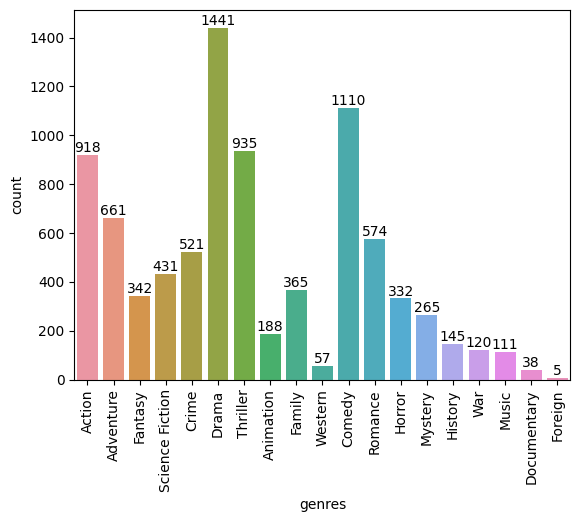

In [24]:
ax = sns.countplot(data = movies_genre_df,
            x = 'genres',
            )

plt.xticks(rotation=90)

for container in ax.containers:
    ax.bar_label(container)

#### Generate three different interesting visualisations with a data story.


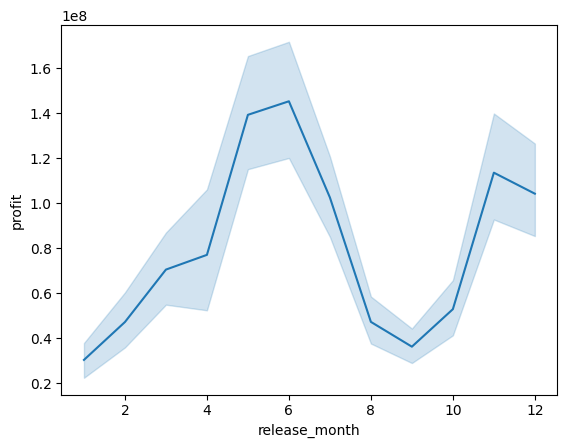

In [25]:
ax = sns.lineplot(data = movies_df, x = 'release_month', y = 'profit',)

# Data is indicative that generally there is a seasonal flucuation with profit
# Movies are generally the most profitable (in all years) in June
# However they are the least profitable in January


In [26]:
movies_genres_profit = movies_genre_df.groupby('genres')['profit'].mean()
movies_genres_profit = movies_genres_profit.reset_index()


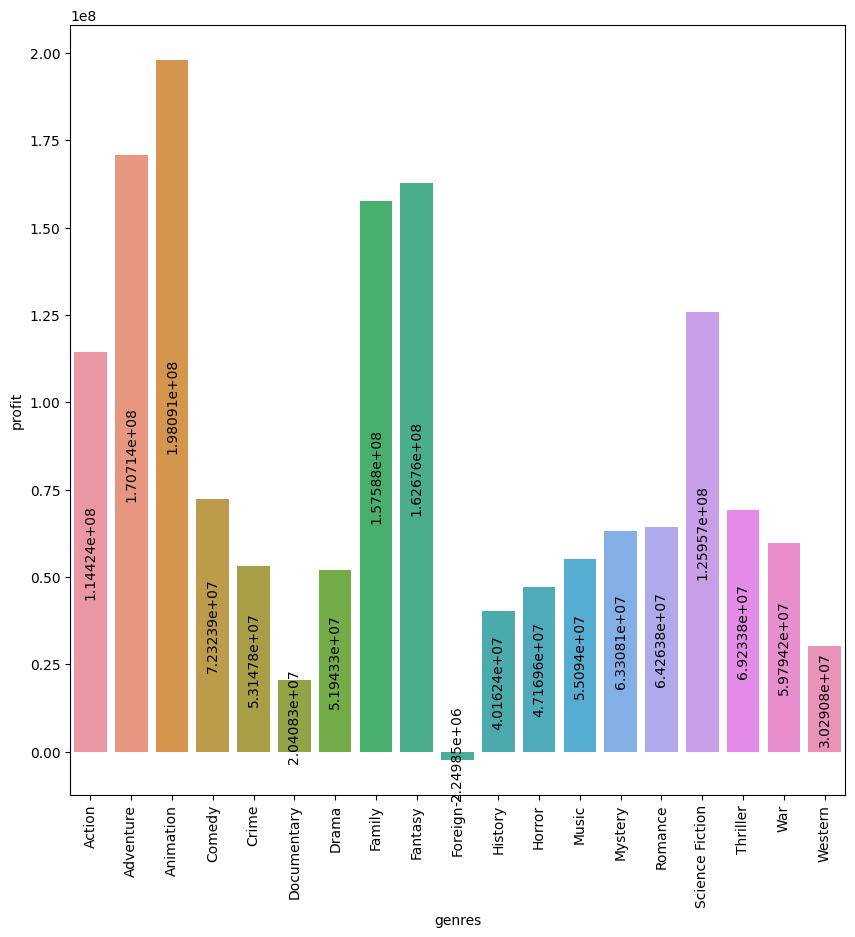

In [27]:
ax = sns.barplot(data = movies_genres_profit, x = 'genres', y = 'profit')

plt.xticks(rotation=90)
ax.figure.set_size_inches(10, 10)

for container in ax.containers:
    ax.bar_label(container, rotation = 90, label_type = 'center')

# data shows that the most profitable genres are animation, adventure and fantasy


In [28]:
# using minmaxscaler to scale popularity as the data has a significantly large range
scaler = preprocessing.MinMaxScaler()

movies_df['popularity_normalised'] = scaler.fit_transform(movies_df[['popularity']])


C:\Users\tayyi\AppData\Local\Temp\ipykernel_2180\1853361790.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['popularity_normalised'] = scaler.fit_transform(movies_df[['popularity']])


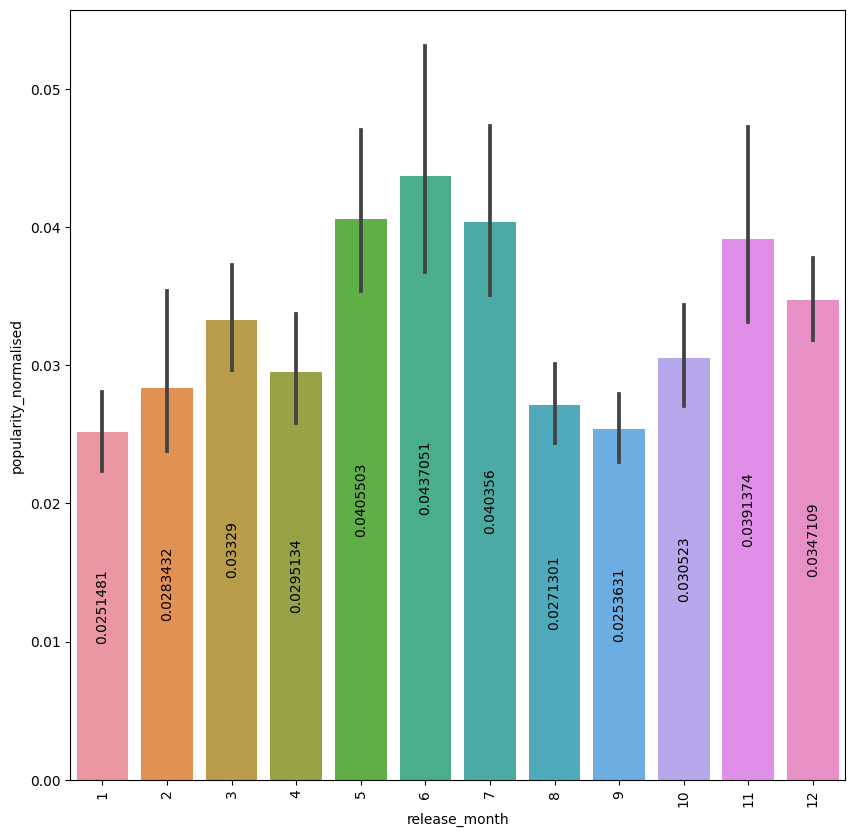

In [29]:
ax = sns.barplot(data = movies_df, x = 'release_month', y = 'popularity_normalised')

plt.xticks(rotation=90)
ax.figure.set_size_inches(10, 10)

for container in ax.containers:
    ax.bar_label(container, rotation = 90, label_type = 'center')

# When plotting release month against popularity (normalised), there is a general relationship between the month a movie is released and the popularity of said movie
# This relationship is relatively similar to the relationship seen between release month and profit made (the most popular movies and most profitable movies are released in June)
# However this may simply be because of the number of movies released, there may be other compounding factors which explain why movies do better in certain months
# It may also coincede with holidays as animation movies are the most profitable and movies in the summer are also the most profitable and popular
# However it should be noted that further analysis is needed to understand the data without making solid conclusions 



# Now that you know how to Explore a Dataset, it's time for you to do it from start to end. Please find the Automobile Dataset in your task folder. 

### You are expected to create a report ('eda.docx' provides a template for what this report should look like) in which you explain your visualisations, investigations and findings. The Code for the Analysis should be in a jupyter notebook named automobile.ipynb.

## Be creative :)